In [2]:
import pandas as pd

In [4]:
df_codis_info = pd.read_csv("data/codis_info.csv")

In [40]:
df_codis_info.tail()

,name,color1_ratio,color1_R,color1_G,color1_B,color2_ratio,color2_R,color2_G,color2_B,color3_ratio,color3_R,color3_G,color3_B
1111,395456,0.415858,234.213846,233.892050,238.172338,0.406465,21.032728,24.042036,28.724366,0.177676,62.151578,79.271948,111.419753
1112,395456,0.630105,23.762724,24.237317,24.749171,0.344864,242.026831,241.340823,245.811664,0.025032,125.399797,125.049847,125.988810
1113,395456,0.633765,27.652136,26.313005,27.067119,0.239537,75.118029,94.092819,129.669786,0.126698,206.167809,210.916997,216.312883
1114,395456,0.635646,33.647317,34.603687,35.937386,0.295892,198.603922,7.386471,13.563333,0.068461,233.768644,231.126271,231.515254
1115,395456,0.873488,28.301509,29.352811,33.009831,0.095912,240.303279,240.676545,241.539723,0.030600,102.306324,104.029644,105.644269


### Naive Bayes (Good / Bad)

In [5]:
ar_codis_RGB = df_codis_info.filter(regex="[RGB]").values

In [6]:
ar_codis_RGB.shape

(1116, 9)

In [7]:
ar_codis_RGB

array([[  19.35298071,   74.59888556,  101.89692829, ...,  225.59596231,
         231.41857335,  234.08371467],
       [ 235.85371309,  237.4992544 ,  243.46704444, ...,  111.74219517,
         129.04810524,  134.95169841],
       [  29.92717021,   32.79407964,   34.38682016, ...,  242.47294939,
         243.43310064,  245.64601513],
       ..., 
       [  27.65213626,   26.3130052 ,   27.06711894, ...,  206.16780946,
         210.91699747,  216.31288344],
       [  33.64731654,   34.60368748,   35.93738591, ...,  233.76864407,
         231.12627119,  231.51525424],
       [  28.30150928,   29.35281086,   33.00983107, ...,  102.30632411,
         104.02964427,  105.64426877]])

##### 가짜 데이터 생성 (0~ 255)

In [8]:
import random

In [9]:
for _ in range(1116):
    fake_data = np.array([[random.randint(0, 256) for _ in range(0, 9)]])
    ar_codis_RGB = np.vstack([ar_codis_RGB, fake_data])

In [10]:
X = ar_codis_RGB

In [11]:
# target
ar_good = np.ones(1116)
ar_bad = np.zeros(1116)

In [12]:
y = np.concatenate([ar_good, ar_bad])

### MultinomialNB

In [13]:
from sklearn.naive_bayes import MultinomialNB

In [14]:
mnb = MultinomialNB()

In [15]:
mnb.fit(X, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

##### 성능 확인

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

In [17]:
y_pred = mnb.predict(X)

In [18]:
confusion_matrix(y, y_pred)

array([[658, 458],
       [484, 632]], dtype=int64)

### QDA

In [19]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [20]:
qda = QuadraticDiscriminantAnalysis()

In [21]:
qda.fit(X, y)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

##### 성능확인

In [22]:
y_pred = qda.predict(X)

In [23]:
confusion_matrix(y, y_pred)

array([[1112,    4],
       [  69, 1047]], dtype=int64)

In [24]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

        0.0       0.94      1.00      0.97      1116
        1.0       1.00      0.94      0.97      1116

avg / total       0.97      0.97      0.97      2232



##### cross_valadation

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
cross_val_score(qda, X, y, cv=5).mean()

0.96594530749519536

##### ROC curve

In [27]:
qda.decision_function(X)

array([   6.49813424,    8.30660235,   12.68705635, ...,  -52.69988734,
       -369.48452878, -173.45325211])

In [28]:
fpr, tpr, thresholds = roc_curve(y, qda.decision_function(X))

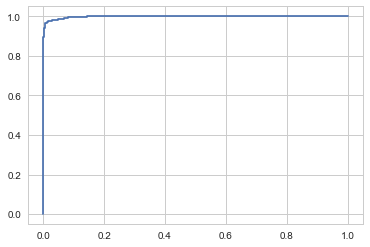

In [29]:
plt.plot(fpr, tpr)